<a href="https://colab.research.google.com/github/sohil344/EDA/blob/main/HandlingMixedValues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd



In [2]:
df=pd.read_csv('/content/Titanic_toy.csv')

In [3]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [4]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

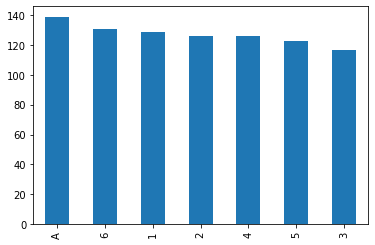

In [8]:
fig=df['number'].value_counts().plot.bar()
fig.set_title('Passengers Travelling with')

In [9]:
#extract numerical part
df['number_numerical']=pd.to_numeric(df['number'],errors='coerce',downcast='integer')

In [10]:
df['number_numerical']

0      5.0
1      3.0
2      6.0
3      3.0
4      NaN
      ... 
886    3.0
887    3.0
888    1.0
889    2.0
890    3.0
Name: number_numerical, Length: 891, dtype: float64

In [11]:
#extract categorical part
df['number_categorical']=np.where(df['number_numerical'].isnull(),df['number'],np.nan)

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [12]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [16]:
df['cabin_num']=df['Cabin'].str.extract('(\d+)')
df['cabin_cat']=df['Cabin'].str[0]

df.sample(10)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
233,NaN,347077,4,1,4.0,NaN,NaN,NaN
676,NaN,342826,3,0,3.0,NaN,NaN,NaN
659,D48,35273,6,0,6.0,NaN,48,D
414,NaN,STON/O 2. 3101269,6,1,6.0,NaN,NaN,NaN
558,E67,110413,1,1,1.0,NaN,67,E
881,NaN,349257,A,0,NaN,A,NaN,NaN
276,NaN,347073,1,0,1.0,NaN,NaN,NaN
455,NaN,349240,5,1,5.0,NaN,NaN,NaN
202,NaN,3101264,2,0,2.0,NaN,NaN,NaN
448,NaN,2666,1,1,1.0,NaN,NaN,NaN


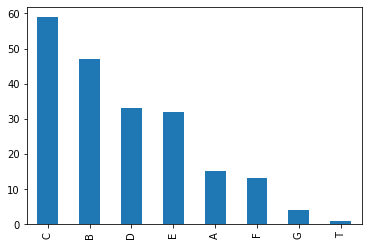

In [17]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [21]:
#extract last bit of ticket as number
df['ticket_num']=df['Ticket'].apply(lambda s:s.split()[-1])
df['ticket_num']=pd.to_numeric(df['ticket_num'],errors='coerce',downcast='integer')

In [27]:
#extract first bit of ticket as category
df['ticket_cat']=df['Ticket'].apply(lambda s:s.split()[0])
df['ticket_cat']=np.where(df['ticket_cat'].str.isdigit(),np.nan,df['ticket_cat'])

In [28]:
df.head(10)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN


In [29]:
df['ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)